In [160]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [161]:
# Load the dataset
df = pd.read_csv('futuristic_city_traffic.csv')

# Exploratory Data Analysis

In [162]:
df.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [163]:
df.shape

(1219567, 11)

### Summary Statistics

In [164]:
# Display descriptive statistics with background gradient
df.describe().style.format(precision=2)

,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1219567.00,1219567.00,1219567.00,1219567.00,1219567.00,1219567.00
mean,11.51,59.94,0.15,0.05,49.46,0.28
std,6.92,26.63,0.36,0.22,25.28,0.22
min,0.00,6.69,0.00,0.00,4.93,0.01
25%,6.00,37.53,0.00,0.00,29.27,0.11
50%,12.00,58.47,0.00,0.00,45.78,0.22
75%,17.00,80.53,0.00,0.00,65.91,0.40
max,23.00,163.09,1.00,1.00,189.95,3.38


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


### Check For Missing Values

In [166]:
print("Missing Values")
df.isnull().sum()

Missing Values


City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

### Check For Duplicates

In [167]:
print('Duplicate Values:')
df.duplicated().sum()

Duplicate Values:


0


# Analyzing traffic density throughout the day

By grouping data by Hour of Day and calculating the average Traffic Density for each hour

In [168]:

traffic_flow = df.groupby('Hour Of Day')['Traffic Density'].mean()

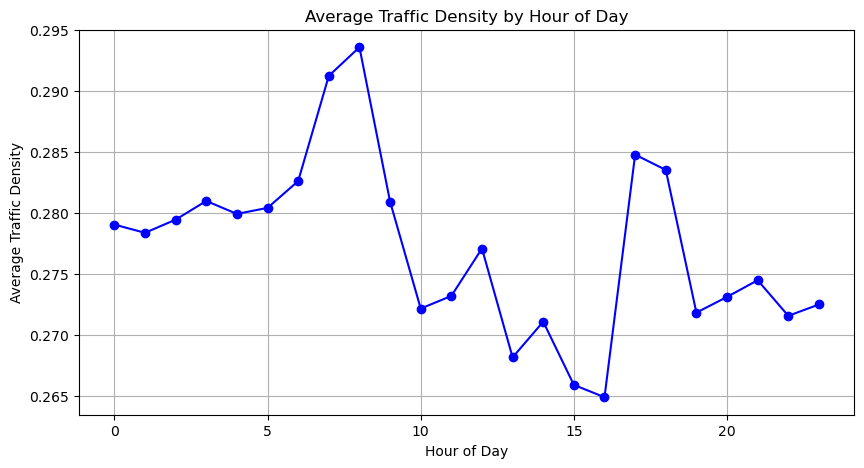

In [169]:
# Plotting
plt.figure(figsize=(10, 5))
traffic_flow.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Average Traffic Density by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Density')
plt.grid(True)
plt.show()

### Insights:

 - ```Plot Interpretation:``` There is a noticeable peak during morning and evening rush hours, with lower traffic density during late-night hours.

 - These findings can inform urban planning and transportation management strategies, such as optimizing traffic signal timing, managing congestion during peak hours, and planning infrastructure improvements.

 - Further analysis could investigate the causes of traffic density fluctuations, explore correlations with other variables such as weather or economic conditions, and evaluate the effectiveness of interventions aimed at reducing traffic congestion.


# Analyzing Energy Consumption vs. Traffic Density

### Using the following methods:
- ```Scatter Plot```: To visually inspect the relationship between traffic density and energy consumption.

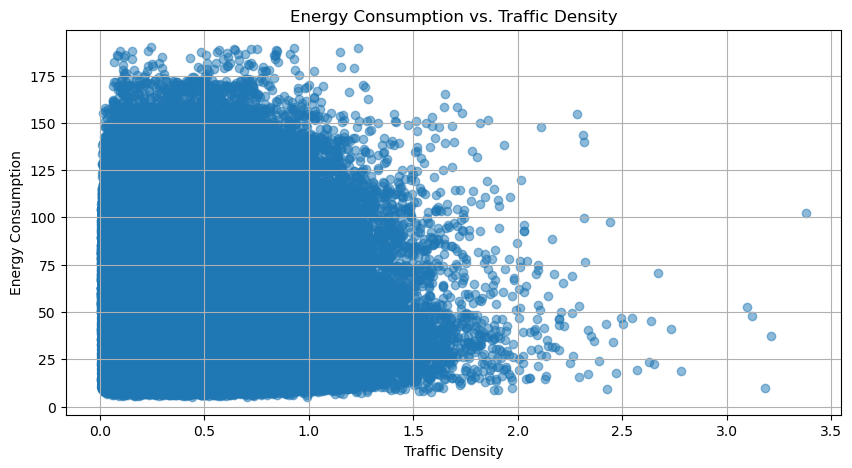

In [170]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Traffic Density'], df['Energy Consumption'], alpha=0.5)
plt.title('Energy Consumption vs. Traffic Density')
plt.xlabel('Traffic Density')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()


- ```Regression Analysis```: To quantify the relationship and predict energy consumption based on traffic density.


Mean Squared Error: 638.1793338387766


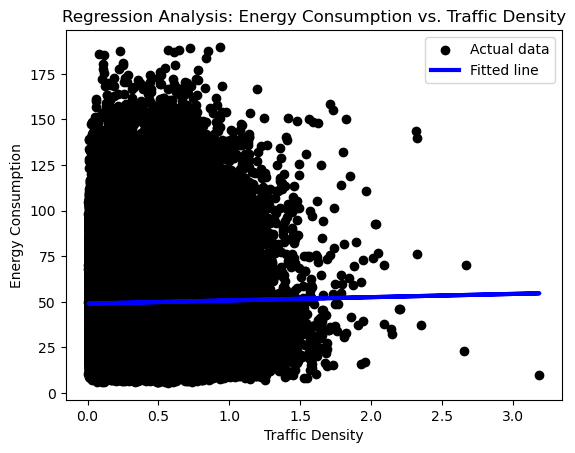

In [171]:
X = df[['Traffic Density']]  # Feature matrix
y = df['Energy Consumption']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting regression
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Fitted line')
plt.title('Regression Analysis: Energy Consumption vs. Traffic Density')
plt.xlabel('Traffic Density')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

- ``Time Series Analysis``: Observe how traffic density and energy consumption patterns emerge across different times and days

1. ***Group by Hour of Day***: This will help visualize how traffic density and energy consumption vary by the hour throughout a typical day.

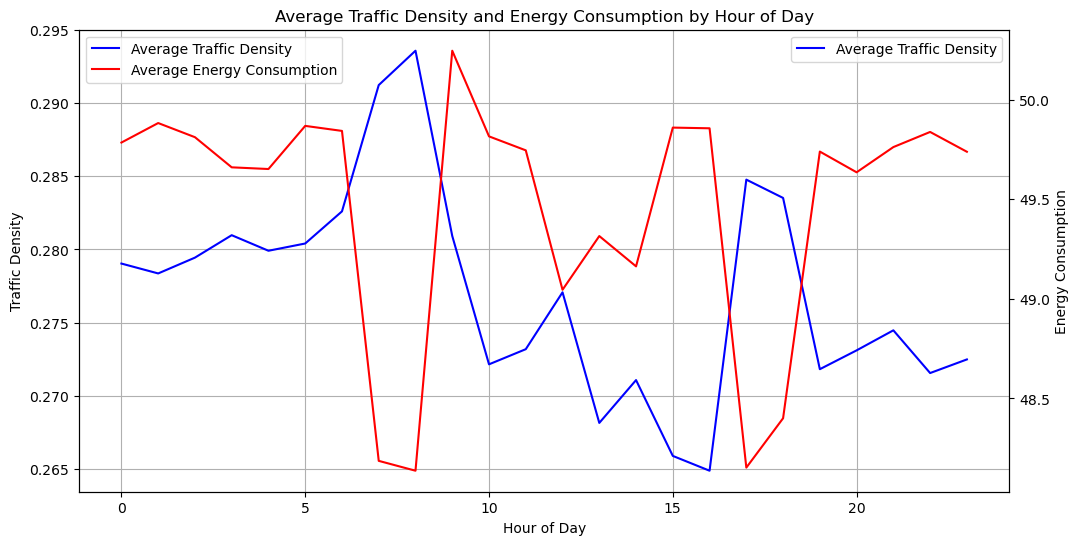

In [172]:
hourly_data = df.groupby('Hour Of Day')[['Traffic Density', 'Energy Consumption']].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Create the first subplot for traffic density
ax = hourly_data['Traffic Density'].plot(color='blue', label='Average Traffic Density', legend=True)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Traffic Density')
ax.set_title('Average Traffic Density and Energy Consumption by Hour of Day')
ax.grid(True)

# Create a second y-axis for the energy consumption
ax2 = ax.twinx()
hourly_data['Energy Consumption'].plot(ax=ax2, color='red', label='Average Energy Consumption', legend=True)
ax2.set_ylabel('Energy Consumption')

# To improve the legend to handle items from both plots
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

2. ***Group by Day of the Week***: This will show patterns related to weekdays versus weekends

In [173]:
# Mapping days of the week from string to an ordered category
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day Of Week'] = pd.Categorical(df['Day Of Week'], categories=days_order, ordered=True)

print(df['Day Of Week'].head())

0       Sunday
1    Wednesday
2    Wednesday
3     Thursday
4     Saturday
Name: Day Of Week, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']


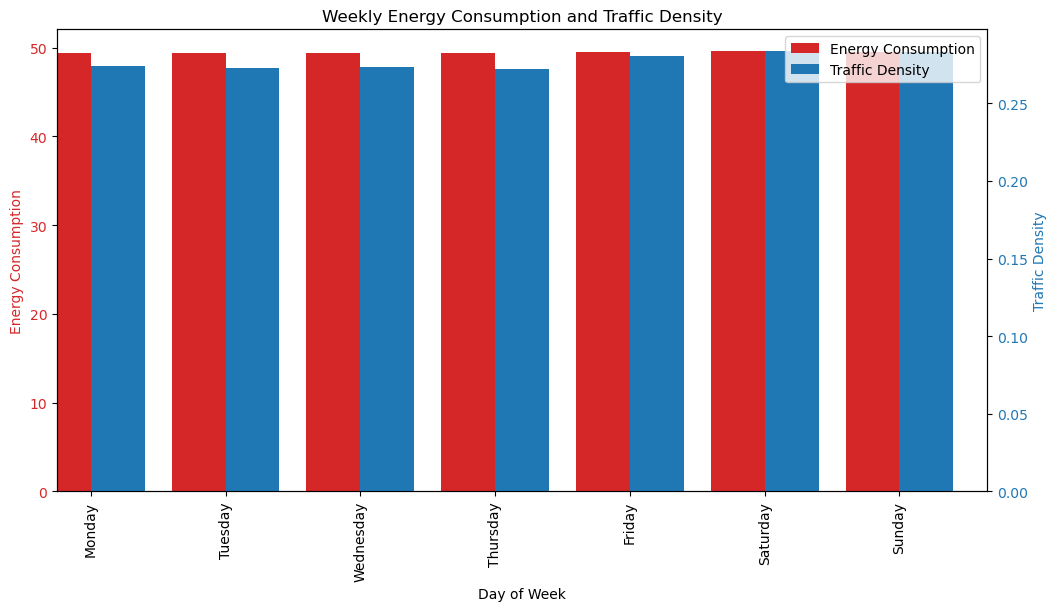

In [174]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Energy Consumption
color = 'tab:red'
weekly_data['Energy Consumption'].plot(kind='bar', color=color, ax=ax1, position=1, width=0.4)
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Energy Consumption', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Traffic Density
ax2 = ax1.twinx()
color = 'tab:blue'
weekly_data['Traffic Density'].plot(kind='bar', color=color, ax=ax2, position=0, width=0.4)
ax2.set_ylabel('Traffic Density', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adjust legend
fig.legend(['Energy Consumption', 'Traffic Density'], loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title('Weekly Energy Consumption and Traffic Density')
plt.show()

# Convert Categorical Data to Numeric

In [176]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convert categorical columns to numeric
df['City'] = le.fit_transform(df['City'])
df['Weather'] = le.fit_transform(df['Weather'])

# Now check the DataFrame's data types to confirm conversion
print(df.dtypes)


City                        int32
Vehicle Type               object
Weather                     int32
Economic Condition         object
Day Of Week              category
Hour Of Day                 int64
Speed                     float64
Is Peak Hour                int64
Random Event Occurred       int64
Energy Consumption        float64
Traffic Density           float64
dtype: object


# Correlation matrix heatmap

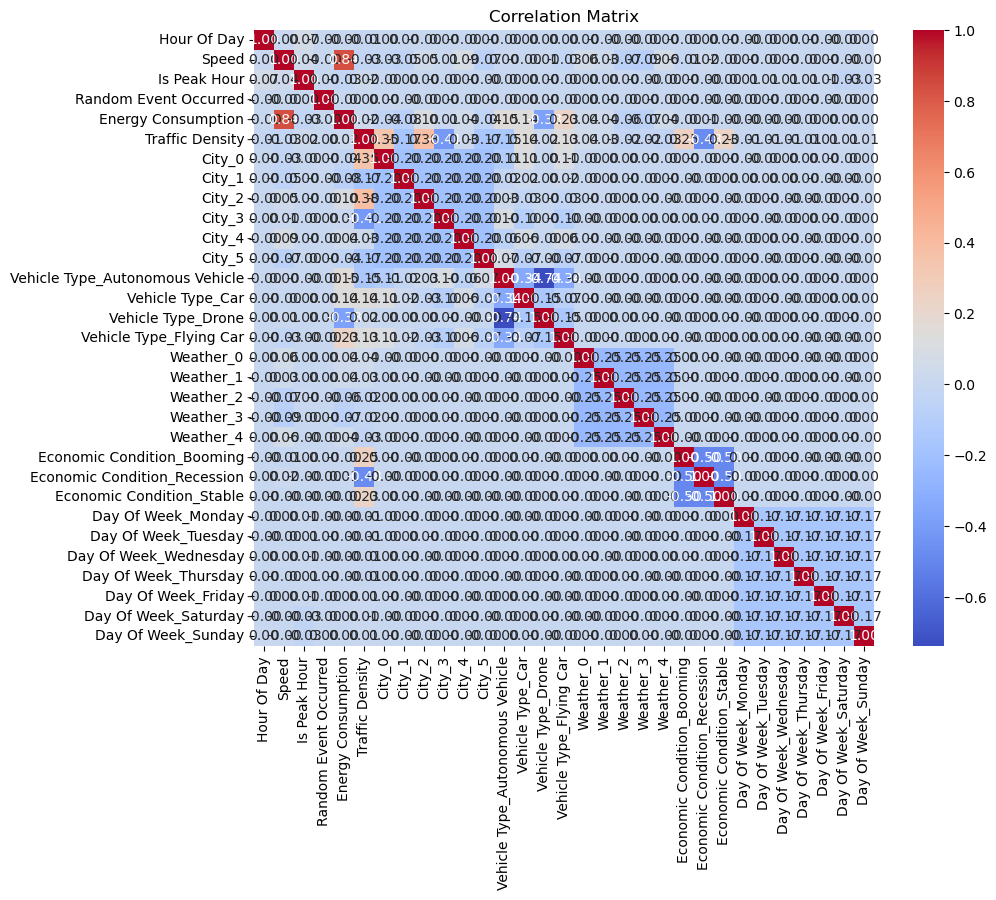

In [177]:
# onehot encode the columns
categorical_features = ['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week']
df = pd.get_dummies(df, columns=categorical_features)
df.head()


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()